In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("hospital_readmissions - hospital_readmissions.csv")

In [4]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [5]:
df.shape

(25000, 17)

In [6]:
df.columns

Index(['age', 'time_in_hospital', 'n_lab_procedures', 'n_procedures',
       'n_medications', 'n_outpatient', 'n_inpatient', 'n_emergency',
       'medical_specialty', 'diag_1', 'diag_2', 'diag_3', 'glucose_test',
       'A1Ctest', 'change', 'diabetes_med', 'readmitted'],
      dtype='object')

In [7]:
df.isnull().any()

age                  False
time_in_hospital     False
n_lab_procedures     False
n_procedures         False
n_medications        False
n_outpatient         False
n_inpatient          False
n_emergency          False
medical_specialty    False
diag_1               False
diag_2               False
diag_3               False
glucose_test         False
A1Ctest              False
change               False
diabetes_med         False
readmitted           False
dtype: bool

In [10]:
# Replace 'Yes' with 1 and 'No' with 0
df.replace({'yes': 1, 'no': 0}, inplace=True)

In [11]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,0,0,0,1,0
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,0,0,0,1,0
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,0,0,1,1,1
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,0,0,1,1,1
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,0,0,0,1,0


In [13]:
categorical_columns = df.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    print(df[col].unique())

['[70-80)' '[50-60)' '[60-70)' '[40-50)' '[80-90)' '[90-100)']
['Missing' 'Other' 'InternalMedicine' 'Family/GeneralPractice'
 'Cardiology' 'Surgery' 'Emergency/Trauma']
['Circulatory' 'Other' 'Injury' 'Digestive' 'Respiratory' 'Diabetes'
 'Musculoskeletal' 'Missing']
['Respiratory' 'Other' 'Circulatory' 'Injury' 'Diabetes' 'Digestive'
 'Musculoskeletal' 'Missing']
['Other' 'Circulatory' 'Diabetes' 'Respiratory' 'Injury' 'Musculoskeletal'
 'Digestive' 'Missing']
[0 'normal' 'high']
[0 'normal' 'high']


<Axes: xlabel='age', ylabel='readmitted'>

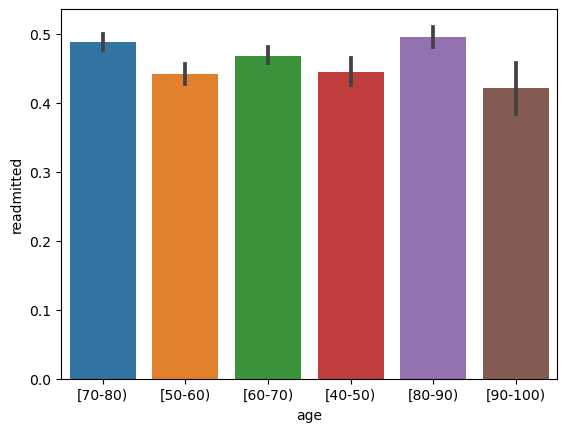

In [14]:
sns.barplot(x= df["age"], y = df["readmitted"])

In [24]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [27]:
x = x.select_dtypes(include=['float64', 'int64'])

In [28]:
from sklearn.preprocessing import StandardScaler

# Assuming X is your feature matrix and y is your target variable
scaler = StandardScaler()
X_standardized = scaler.fit_transform(x)

In [32]:
#Check for Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = x.columns
vif_data['VIF'] = [variance_inflation_factor(X_standardized, i) for i in range(X_standardized.shape[1])]

# Display features with high VIF (typically > 5 or 10)
print(vif_data)


            Feature       VIF
0  time_in_hospital  1.337853
1  n_lab_procedures  1.151192
2      n_procedures  1.192224
3     n_medications  1.559643
4      n_outpatient  1.026533
5       n_inpatient  1.080944
6       n_emergency  1.058825
7            change  1.394774
8      diabetes_med  1.358126


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression(solver='lbfgs', verbose=1)
model.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(verbose=1)

Text(0.5, 1.0, 'Cost Function of Logistic Regression')

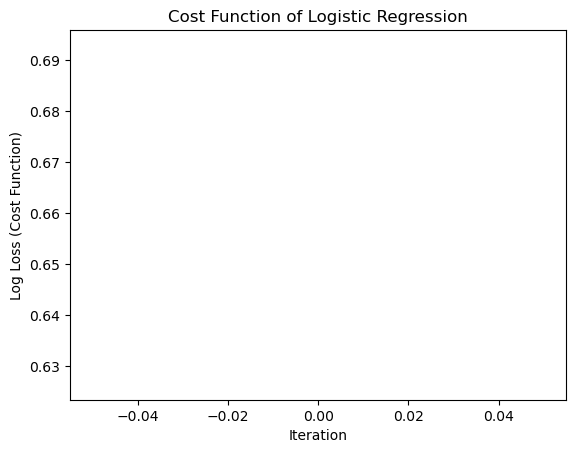

In [41]:
from sklearn.metrics import log_loss
# Obtain the predicted probabilities
y_prob = model.predict_proba(X_standardized)

# Calculate the log loss for each iteration
loss = log_loss(y, y_prob)

# Plotting the cost function (log loss)
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Log Loss (Cost Function)')
plt.title('Cost Function of Logistic Regression')

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6134
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.80      0.69      2658
           1       0.64      0.41      0.50      2342

    accuracy                           0.61      5000
   macro avg       0.62      0.60      0.59      5000
weighted avg       0.62      0.61      0.60      5000

Confusion Matrix:
 [[2116  542]
 [1391  951]]


In [ ]:


# Fit the model and capture the training process for each iteration
model.fit(X_standardized, y)

# Obtain the predicted probabilities
y_prob = model.predict_proba(X_standardized)

# Calculate the log loss for each iteration
loss = log_loss(y, y_prob)

# Plotting the cost function (log loss)
plt.plot(loss)
plt.xlabel('Iteration')
plt.ylabel('Log Loss (Cost Function)')
plt.title('Cost Function of Logistic Regression')
plt.show()
